In [61]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## How to use gradient ascent to accomplish PCA

### Making data

In [62]:
# making data
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3 + np.random.normal(0, 10, size=100)
# X[:, 1] = 0.75 * X[:, 0] + 3

The middle point of X axis and Y axis is (49.43137133286144, 39.25952819573814).


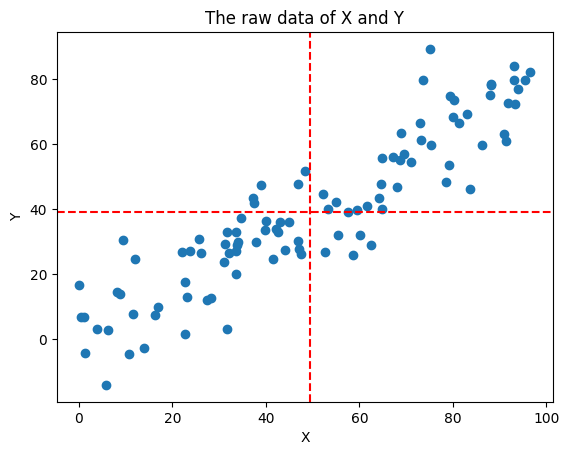

In [83]:
# Calculate the middle point of x and y.
x_mid, y_mid = np.mean(X[:, 0]), np.mean(X[:, 1])
print(f'The middle point of X axis and Y axis is ({x_mid}, {y_mid}).')

# Plot data
plt.scatter(X[:, 0], X[:, 1])
plt.axvline(x_mid, color='r', linestyle='--')
plt.axhline(y_mid, color='r', linestyle='--')
plt.title('The raw data of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Demean the data

In [64]:
def get_demean(X):
    """
    Get the demean of matrix.
    :param X: Matrix.
    :return: The matrix that be demeaned.
    """
    return X - np.mean(X, axis=0)


X_demean = get_demean(X)

The middle point of X axis and Y axis is (1.7834622667578513e-14, 4.121147867408581e-15).


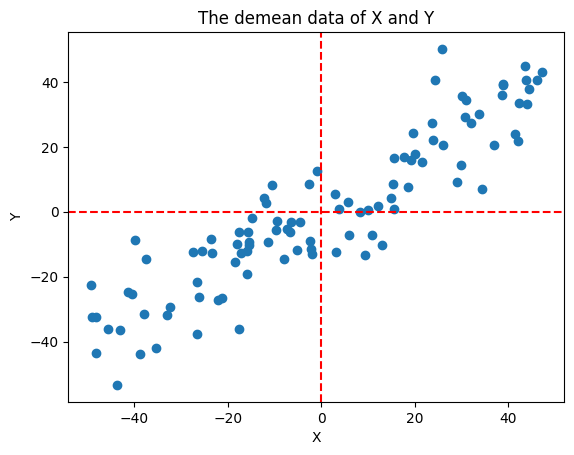

In [84]:
# Calculate the middle point of x and y.
x_mid, y_mid = np.mean(X_demean[:, 0]), np.mean(X_demean[:, 1])
print(f'The middle point of X axis and Y axis is ({x_mid}, {y_mid}).')

# Plot data
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.axvline(x_mid, color='r', linestyle='--')
plt.axhline(y_mid, color='r', linestyle='--')
plt.title('The demean data of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Gradient ascent

In [66]:
def fun(w, X):
    return np.sum(X.dot(w) ** 2) / len(X)


def get_der(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)


def direction(w):
    return w / np.linalg.norm(w)


def get_der_debug(w, X, epsilon=1e-4):
    res = np.empty(len(w))

    for i in range(len(w)):
        w_1, w_2 = w.copy(), w.copy()
        w_1[i] += epsilon
        w_2[i] -= epsilon
        res[i] = (fun(w_1, X) - fun(w_2, X)) / (2 * epsilon)

    return res


def gradient_ascent(df, X, initial_w, eta, n_iters=1e5, epsilon=1e-4):
    w = direction(initial_w)
    cur_iter = 0

    while cur_iter <= n_iters:
        gradient = df(w, X)
        last_w = w
        w += eta * gradient
        w = direction(w)

        if abs(fun(w, X) - fun(last_w, X)) < epsilon:
            print('Step is too small!!!')
            break

        cur_iter += 1

    return w

In [67]:
initial_w = np.random.random(X_demean.shape[1])
eta = 0.01

gradient_ascent(get_der_debug, X_demean, initial_w, eta)

array([0.76012172, 0.6497807 ])

In [68]:
gradient_ascent(get_der, X_demean, initial_w, eta)

array([0.76012172, 0.6497807 ])

In [86]:
w = gradient_ascent(get_der, X_demean, initial_w, eta)
a, b = w
k = b / a
print(k)

x_list = np.linspace(np.min(X_demean[:, 0]), np.max(X_demean[:, 1]), 200)
y_list = x_list * k

0.8548376976381301


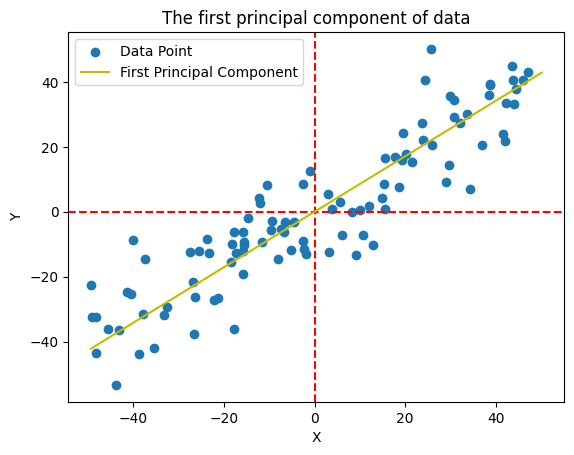

In [87]:
# Plot data
plt.scatter(X_demean[:, 0], X_demean[:, 1], label='Data Point')
plt.axvline(x_mid, color='r', linestyle='--')
plt.axhline(y_mid, color='r', linestyle='--')
plt.plot(x_list, y_list, color='y', label='First Principal Component')
plt.legend()
plt.title('The first principal component of data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### How to get second and more principal component?

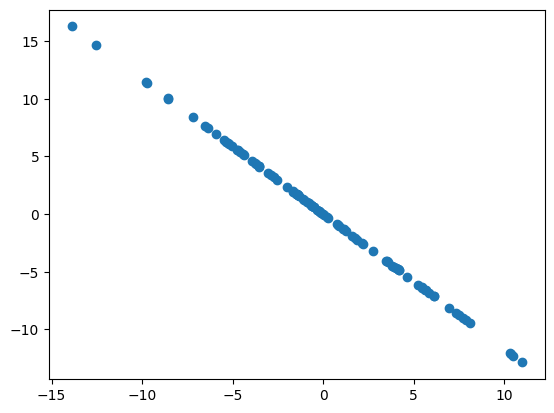

In [88]:
X_v = np.empty(X_demean.shape)

for i in range(len(X_demean)):
    X_v[i] = X_demean[i] - X_demean[i].dot(w) * w

plt.scatter(X_v[:, 0], X_v[:, 1])
plt.show()

In [89]:
w_v = gradient_ascent(get_der, X_v, initial_w, eta)
a_v, b_v = w_v
k_v = b_v / a_v
print(k_v)

x_list_v = x_list[50:150]
y_list_v = x_list_v * k_v

-1.1698127056901504


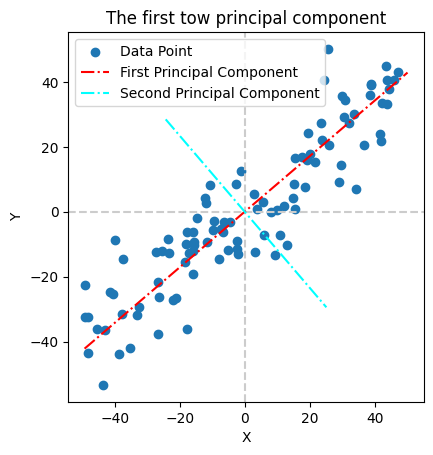

In [98]:
# Plot data
plt.scatter(X_demean[:, 0], X_demean[:, 1], label='Data Point')
plt.axvline(x_mid, color='#ccc', linestyle='--')
plt.axhline(y_mid, color='#ccc', linestyle='--')
plt.plot(x_list, y_list, color='r', linestyle='-.', label='First Principal Component')
plt.plot(x_list_v, y_list_v, color='cyan', linestyle='-.', label='Second Principal Component')
plt.legend()
plt.title('The first tow principal component')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')
plt.show()

In [94]:
k_v * k, w.dot(w_v)

(-0.9999999999999997, 1.6653345369377348e-16)

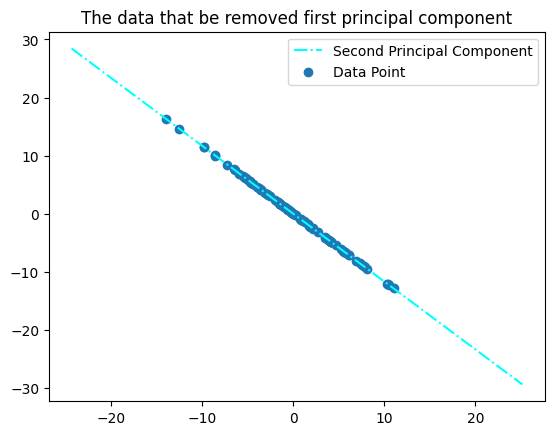

In [75]:
plt.plot(x_list_v, y_list_v, color='cyan', linestyle='-.', label='Second Principal Component')
plt.scatter(X_v[:, 0], X_v[:, 1], label='Data Point')
plt.title('The data that be removed first principal component')
plt.legend()
plt.show()

In [81]:
def get_first_n_com(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = get_demean(X_pca)
    res = []
    for i in range(n):
        ini_w = np.random.random(X_pca.shape[1])
        w = gradient_ascent(get_der, X_pca, ini_w, eta)
        res.append(w)

        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

    return res


get_first_n_com(2, X)

[array([0.76012172, 0.6497807 ]), array([ 0.6497807 , -0.76012172])]

In [117]:
import numpy as np


class PCA:
    def __init__(self, n_components):
        assert n_components >= 1, 'n_components must be valid!'
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, eta=0.01, n_iters=1e4):
        assert self.n_components <= X.shape[1], 'n_components must be smaller than the feature number of X!'

        def fun(w, X):
            return np.sum(X.dot(w) ** 2) / len(X)

        def get_der(w, X):
            return X.T.dot(X.dot(w)) * 2 / len(X)

        def direction(w):
            return w / np.linalg.norm(w)

        def get_der_debug(w, X, epsilon=1e-4):
            res = np.empty(len(w))

            for i in range(len(w)):
                w_1, w_2 = w.copy(), w.copy()
                w_1[i] += epsilon
                w_2[i] -= epsilon
                res[i] = (fun(w_1, X) - fun(w_2, X)) / (2 * epsilon)

            return res

        def gradient_ascent(df, X, initial_w, eta, n_iters=1e5, epsilon=1e-4):
            w = direction(initial_w)
            cur_iter = 0

            while cur_iter <= n_iters:
                gradient = df(w, X)
                last_w = w
                w += eta * gradient
                w = direction(w)

                if abs(fun(w, X) - fun(last_w, X)) < epsilon:
                    print('Step is too small!!!')
                    break

                cur_iter += 1

            return w

        X_pca = get_demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        for i in range(self.n_components):
            ini_w = np.random.random(X_pca.shape[1])
            w = gradient_ascent(get_der, X_pca, ini_w, eta)
            self.components_[i, :] = w

            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w

        return self

    def transform(self, X):
        assert X.shape[1] == self.components_.shape[1], 'Dimensions do not match.'

        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        assert X.shape[1] == self.components_.shape[0], 'Dimensions do not match.'

        return X.dot(self.components_)

    def __repr__(self):
        return f'PCA(n_components={self.n_components})'

In [130]:
pcaer = PCA(2)
pcaer.fit(X)

PCA(n_components=2)

In [131]:
pcaer.components_

array([[ 0.76012172,  0.6497807 ],
       [ 0.6497807 , -0.76012172]])

In [132]:
X_reduction = pcaer.transform(X)
X_reduction.shape

(100, 2)

In [133]:
X_restore = pcaer.inverse_transform(X_reduction)
X_restore

2 2


array([[ 83.0444525 ,  69.30772003],
       [ 73.04100169,  66.56894403],
       [ 88.23469312,  78.31243397],
       [ 93.12213274,  79.94129418],
       [ 42.13534863,  34.09622455],
       [ 93.00440659,  84.10707792],
       [ 46.84392304,  47.91857975],
       [ 10.65698195,  -4.48808951],
       [ 23.8458604 ,  27.05385108],
       [ 55.41270934,  32.00127178],
       [ 62.43401118,  29.12158992],
       [ 52.3242261 ,  44.70334552],
       [ 78.43074433,  48.41765255],
       [ 31.28744137,  29.25233385],
       [ 60.21014326,  32.06995516],
       [ 71.03018764,  54.49685427],
       [ 64.21546124,  43.5826647 ],
       [ 47.13302773,  27.89456019],
       [ 41.48203869,  24.71931225],
       [ 16.34531644,   7.40187763],
       [ 68.9529306 ,  63.41560907],
       [ 46.94253175,  30.13051562],
       [ 27.35717479,  11.95330735],
       [ 55.07745813,  42.34411512],
       [ 61.53813302,  41.14499956],
       [ 33.88859464,  29.03886324],
       [ 48.43465929,  51.66761098],
 

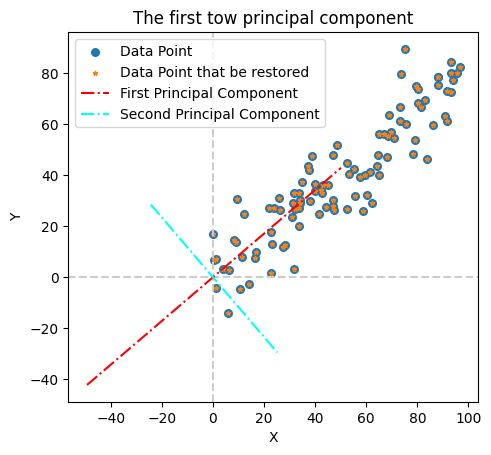

In [140]:
# Plot data
plt.scatter(X[:, 0], X[:, 1], label='Data Point', s=30)
plt.scatter(X_restore[:, 0], X_restore[:, 1], label='Data Point that be restored', marker='*', s=10)
plt.axvline(x_mid, color='#ccc', linestyle='--')
plt.axhline(y_mid, color='#ccc', linestyle='--')
plt.plot(x_list, y_list, color='r', linestyle='-.', label='First Principal Component')
plt.plot(x_list_v, y_list_v, color='cyan', linestyle='-.', label='Second Principal Component')
plt.legend()
plt.title('The first tow principal component')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')
plt.show()

In [141]:
pcaer = PCA(1)
pcaer.fit(X)

PCA(n_components=1)

In [142]:
pcaer.components_

array([[0.76012172, 0.6497807 ]])

In [143]:
X_reduction = pcaer.transform(X)
X_reduction.shape

(100, 1)

In [144]:
X_restore = pcaer.inverse_transform(X_reduction)
X_restore

1 1


array([[82.21378636, 70.27944385],
       [75.08122666, 64.18226293],
       [89.66016986, 76.64489317],
       [93.28857364, 79.74658951],
       [41.18572303, 35.20710865],
       [95.2780856 , 81.44729933],
       [50.7332999 , 43.36873728],
       [ 3.94072151,  3.3686773 ],
       [27.14001462, 23.20030761],
       [47.82246015, 40.88044173],
       [50.45695262, 43.13250521],
       [52.31169285, 44.71800708],
       [69.23019083, 59.18057693],
       [32.52550671, 27.80402927],
       [50.62826925, 43.27895312],
       [67.95685321, 58.09207994],
       [58.62875238, 50.1180677 ],
       [41.01022811, 35.05708898],
       [36.17687678, 30.92535806],
       [13.09995861, 11.19833846],
       [71.16172903, 60.8317286 ],
       [42.00452856, 35.90705449],
       [21.71045329, 18.55891391],
       [52.7372159 , 45.08176022],
       [55.87783909, 47.76648332],
       [33.92297837, 28.99864073],
       [53.50409663, 45.73731878],
       [ 3.5972309 ,  3.07504858],
       [54.01209978,

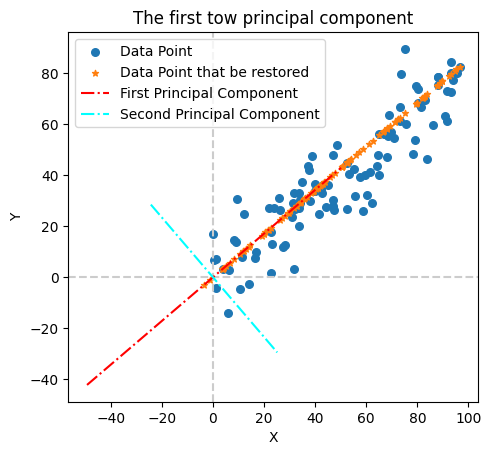

In [147]:
# Plot data
plt.scatter(X[:, 0], X[:, 1], label='Data Point', s=30)
plt.scatter(X_restore[:, 0], X_restore[:, 1], label='Data Point that be restored', marker='*', s=20)
plt.axvline(x_mid, color='#ccc', linestyle='--')
plt.axhline(y_mid, color='#ccc', linestyle='--')
plt.plot(x_list, y_list, color='r', linestyle='-.', label='First Principal Component')
plt.plot(x_list_v, y_list_v, color='cyan', linestyle='-.', label='Second Principal Component')
plt.legend()
plt.title('The first tow principal component')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')
plt.show()

## How to use PCA in scikit-learn

In [148]:
from sklearn.decomposition import PCA

pcaer = PCA(n_components=1)
pcaer.fit(X)

PCA(n_components=1)

In [149]:
pcaer.components_

array([[-0.76012172, -0.6497807 ]])

In [151]:
X_reduction = pcaer.transform(X)
X_reduction.shape

(100, 1)

In [152]:
X_restore = pcaer.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

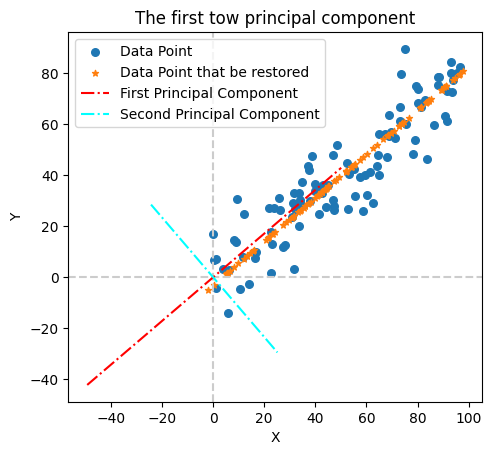

In [153]:
# Plot data
plt.scatter(X[:, 0], X[:, 1], label='Data Point', s=30)
plt.scatter(X_restore[:, 0], X_restore[:, 1], label='Data Point that be restored', marker='*', s=20)
plt.axvline(x_mid, color='#ccc', linestyle='--')
plt.axhline(y_mid, color='#ccc', linestyle='--')
plt.plot(x_list, y_list, color='r', linestyle='-.', label='First Principal Component')
plt.plot(x_list_v, y_list_v, color='cyan', linestyle='-.', label='Second Principal Component')
plt.legend()
plt.title('The first tow principal component')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')
plt.show()

## Using PCA to classify digits

In [154]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [158]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


KNeighborsClassifier()

In [159]:
knn_classifier.score(X_test, y_test)

0.9866666666666667

In [160]:
from sklearn.decomposition import PCA

pcaer = PCA(n_components=2)
pcaer.fit(X_train)
X_train_red = pcaer.transform(X_train)
X_test_red = pcaer.transform(X_test)

In [161]:
%%time

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_red, y_train)

CPU times: total: 0 ns
Wall time: 1.06 ms


KNeighborsClassifier()

In [162]:
# 对多维数据进行降维后，最然fit速度大大提高，但是识别泛化误差（generalization error）却降低了
knn_classifier.score(X_test_red, y_test)

0.6066666666666667

In [163]:
pcaer.explained_variance_ratio_

array([0.14566817, 0.13735469])

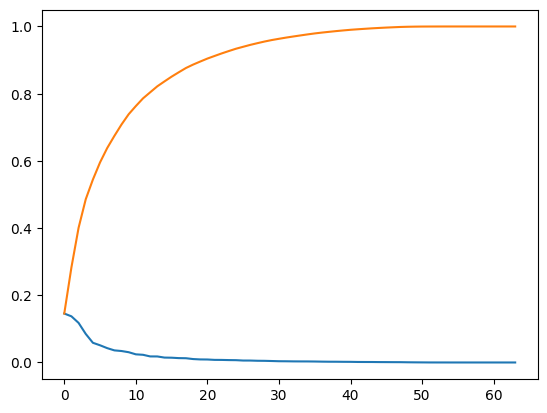

In [174]:
pcaer = PCA(n_components=X_train.shape[1])
pcaer.fit(X_train)
plt.plot(pcaer.explained_variance_ratio_)
plt.plot(np.cumsum(pcaer.explained_variance_ratio_))

In [180]:
pcaer = PCA(0.95)
pcaer.fit(X_train)

PCA(n_components=0.95)

In [181]:
pcaer.n_components_

28

In [182]:
X_train_red = pcaer.transform(X_train)
X_test_red = pcaer.transform(X_test)

In [183]:
%%time

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_red, y_train)

CPU times: total: 15.6 ms
Wall time: 1.1 ms


KNeighborsClassifier()

In [184]:
knn_classifier.score(X_test_red, y_test)

0.98

In [205]:
pcaer = PCA(n_components=2)
pcaer.fit(X)
X_red = pcaer.transform(X)
X_red.shape

(1797, 2)

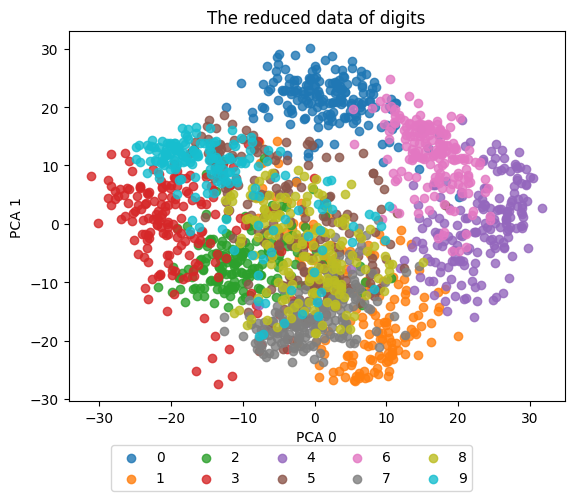

In [225]:
for i in range(10):
    item_X = X_red[y == i]
    plt.scatter(item_X[:, 0], item_X[:, 1], label=i, alpha=.8)

plt.title('The reduced data of digits')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend(ncol=5, loc='upper center', bbox_to_anchor=(0.45, -0.1))
plt.show()

In [208]:
X_red[y == 0][:, 0]

array([-1.25946633e+00,  1.12150792e+01,  6.43536335e+00,  2.40927756e-01,
        6.13436213e+00,  5.01847839e+00,  3.93859318e+00,  1.03227746e+01,
        6.30807645e+00, -3.42946194e+00, -1.26484190e+00,  8.55760770e+00,
        7.65308934e+00,  2.01714498e+00,  3.56096145e+00,  8.08188299e+00,
        6.02371936e+00,  4.28912848e+00,  2.80966596e+00,  1.07821196e+01,
        1.06607738e+01,  5.71082779e+00,  1.47961317e+01,  1.13147429e+01,
        1.38177674e-01,  7.95697346e+00,  5.64839747e+00,  3.15015257e+00,
        6.47393647e-01,  5.81795586e+00, -3.16057270e+00,  3.66312081e+00,
       -6.20413391e-01,  1.11442918e+00,  1.98321146e+00,  3.43969274e+00,
        5.22492084e-01,  1.18940880e+00,  2.47818099e+00, -5.27917543e+00,
       -7.93879421e-01,  4.54016864e+00,  7.51054053e+00, -2.66402227e+00,
        2.80545165e+00,  5.36541452e+00, -5.40400440e+00,  2.17136382e+00,
       -9.04381230e-01,  8.87339261e-02,  2.86331253e+00,  6.09020485e-01,
       -3.52275170e+00,  

In [199]:
X

array([[ -1.25946633,  21.2748837 ],
       [  7.95761194, -20.76869771],
       [  6.99192278,  -9.95598697],
       ...,
       [ 10.801283  ,  -6.96025348],
       [ -4.87210196,  12.42395117],
       [ -0.3443909 ,   6.36554693]])

## PCA在MNIST数据集中的表现

In [252]:
# 使用sklearn的函数来获取MNIST数据集
from sklearn.datasets import fetch_openml
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False


# 耗时巨大
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [253]:
import time

time_begin = time.time()

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

time_end = time.time()
time = time_end - time_begin
print('time:', time)

C:\Users\myxc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyError: "None of [Index([    1,    21,    34,    37,    51,    56,    63,    68,    69,    75,\n       ...\n       59910, 59917, 59927, 59939, 59942, 59948, 59969, 59973, 59990, 59992],\n      dtype='int32', length=60000)] are in the [columns]"

In [264]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [270]:
X_train = np.array(X[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_train = np.array(y[:60000], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [272]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

9.0


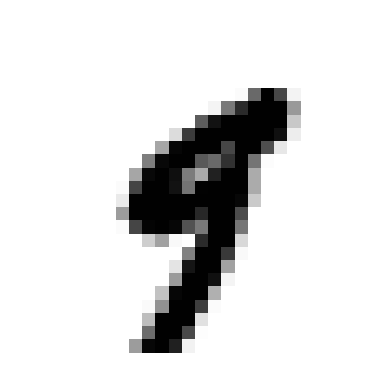

In [275]:
# 展示图片
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


some_digit = X_train[36000]
print(y_train[36000])
plot_digit(X_train[36000].reshape(28, 28))

In [289]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

CPU times: total: 39.2 s
Wall time: 6.01 s


0.9688

In [290]:
from sklearn.decomposition import PCA

pcaer = PCA(0.9)
pcaer.fit(X_train)

PCA(n_components=0.9)

In [291]:
X_train_red = pcaer.transform(X_train)
X_test_red = pcaer.transform(X_test)

In [294]:
# 使用PCA降维后，仅使用87个维度就保存了原来784个维度90%以上的信息，这个时候降维所带来的信息损失还是非常值得的
X_train_red.shape

(60000, 87)

In [293]:
%%time
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_red, y_train)
# 降维后，score得分不降反而得到了升高，说明PCA有一定的降噪作用
knn_classifier.score(X_test_red, y_test)

CPU times: total: 8.98 s
Wall time: 1.4 s


0.9728

## 使用PCA进行降噪处理

In [295]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

In [296]:
X_noisy = X + np.random.normal(0, 4, size=X.shape)

In [315]:
num_i, first_num = 10, 10

example_digits = X_noisy[y == 0, :][:first_num]
for i in range(1, num_i):
    X_i = X_noisy[y == i, :][:first_num]
    example_digits = np.vstack([example_digits, X_i])

example_digits.shape

(100, 64)

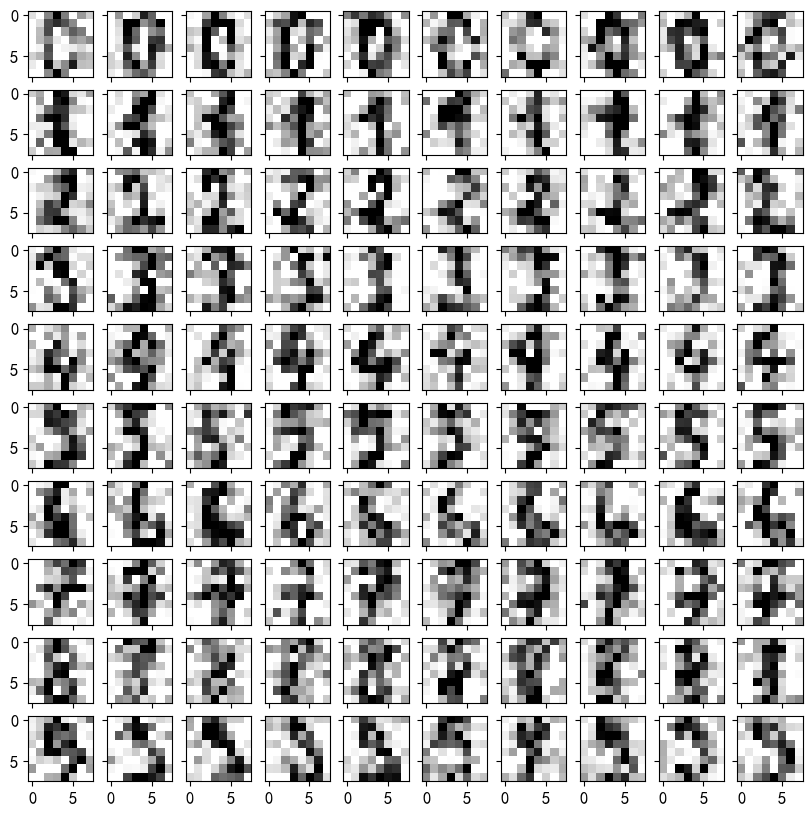

In [318]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flat):
        ax.imshow(
            data[i].reshape(8, 8),
            cmap='binary',
            interpolation='nearest',
            clim=(0, 16)
        )

    plt.show()


plot_digits(example_digits)

In [326]:
from sklearn.decomposition import PCA

pcaer = PCA(0.5)
pcaer.fit(X_noisy)
pcaer.n_components_

12

In [327]:
example_digits_red = pcaer.transform(example_digits)
example_digits_restore = pcaer.inverse_transform(example_digits_red)

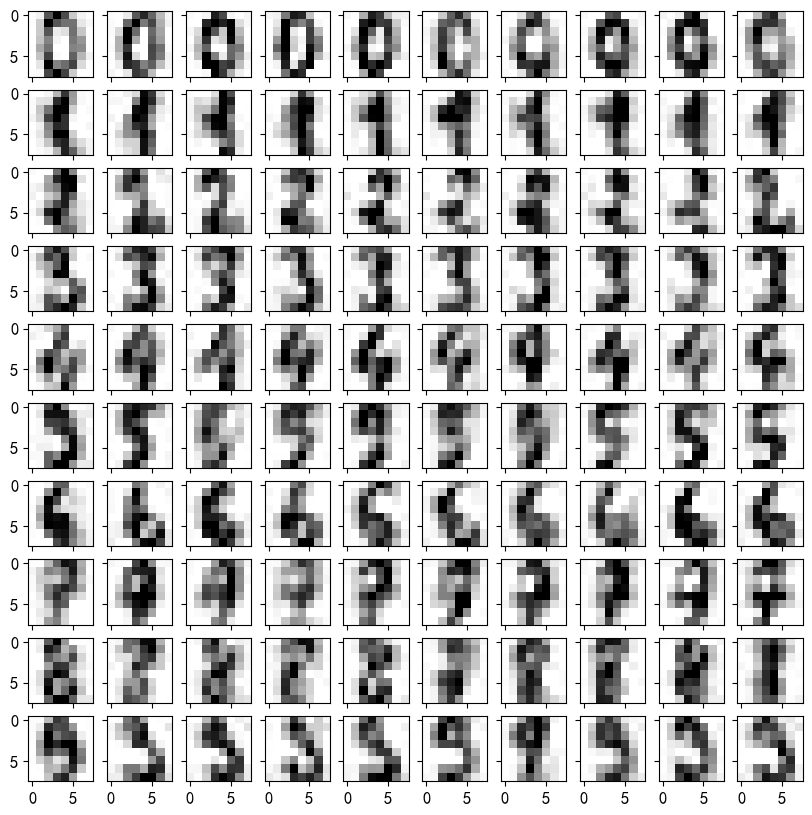

In [328]:
plot_digits(example_digits_restore)

## Eigen face(特征脸)

In [329]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people()
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [330]:
X = faces['data']
y = faces['target']
X.shape, y.shape

((13233, 2914), (13233,))

In [333]:
rand_indexes = np.random.permutation(len(X))
example_faces = X[rand_indexes][:36, :]

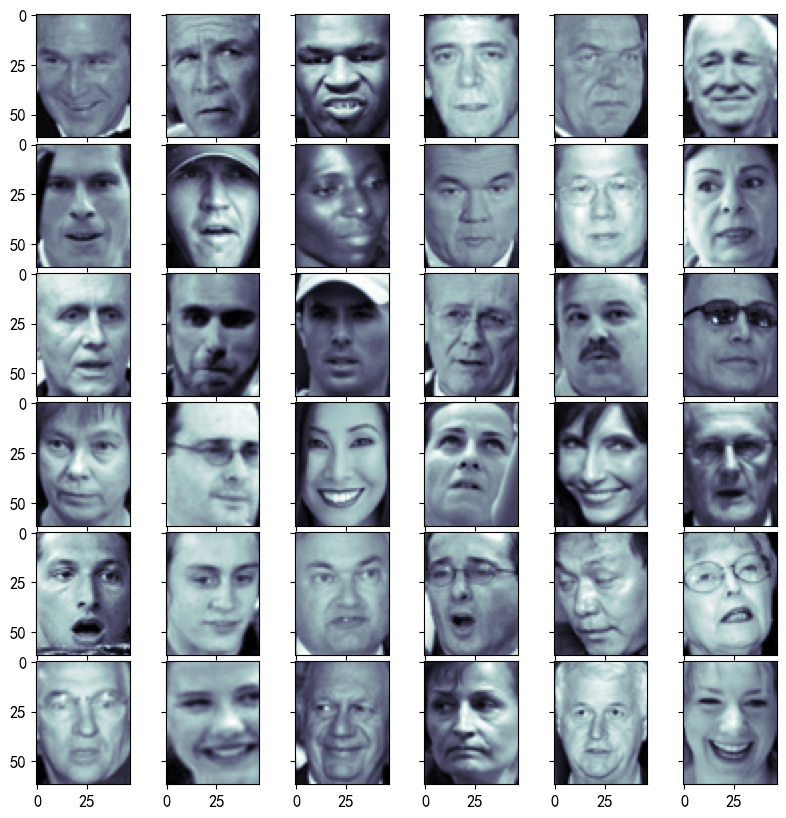

In [344]:
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.05, wspace=0.01)  # 设置子图的横纵间距
    for i, ax in enumerate(axes.flat):
        ax.imshow(
            data[i].reshape(62, 47),
            cmap='bone'
        )

    plt.show()


plot_faces(example_faces)

In [353]:
%%time
from sklearn.decomposition import PCA

pcaer = PCA(svd_solver='randomized')
pcaer.fit(X)
pcaer.components_.shape

CPU times: total: 2min 41s
Wall time: 30.6 s


(2914, 2914)

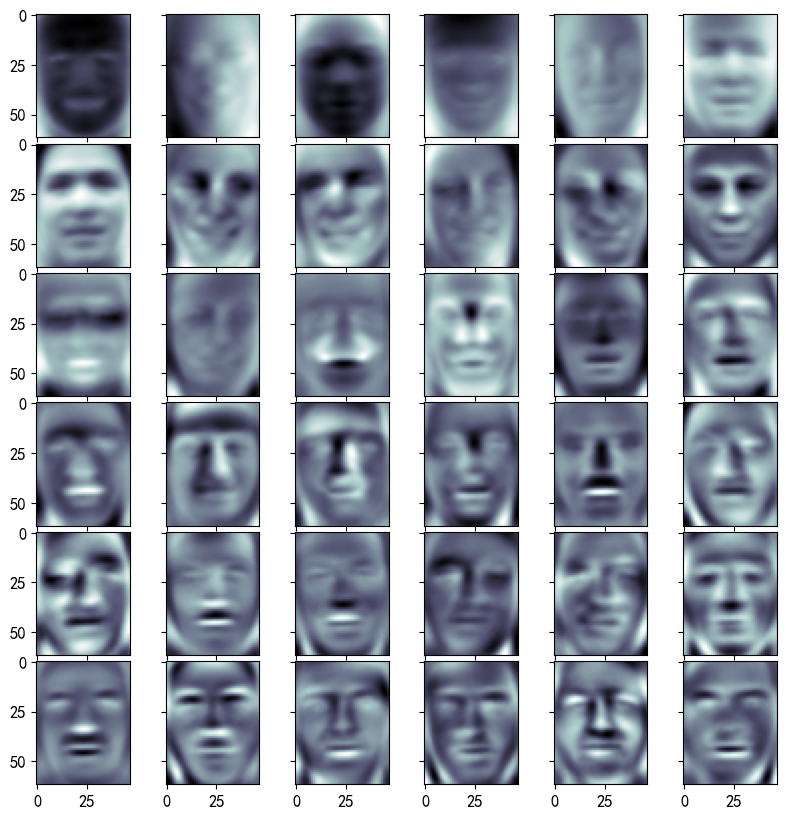

In [354]:
plot_faces(pcaer.components_[:36, :])